# Métodos numéricos para encontrar raíces de funciones

Clase: F1013B Modelación Computacional de Sistemas Eléctricos

Autor: Edoardo Bucheli

Profesor de Cátedra, Tec de Monterrey Campus Santa Fe

Empecemos por importar las librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Para revisar nuestros resultados, importemos las funciones `bisect` y `newton` de scipy

In [2]:
from scipy.optimize import bisect, newton

Podemos definir la función `f` como una función de Python, cuyo nombre podemos pasar como un argumento.

En este caso lo hacemos para la función $f(x) = x \cos{x}+1$

In [3]:
def f(x):
    return x*np.cos(x)+1

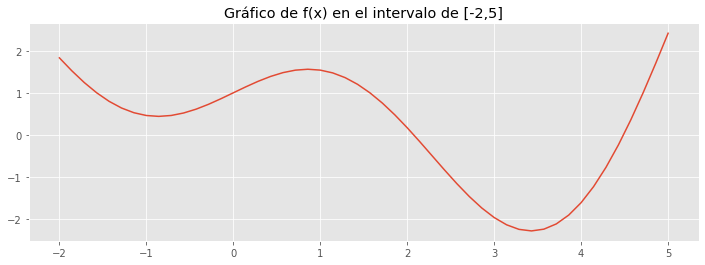

In [6]:
x = np.linspace(-2,5,50)

fig = plt.figure(figsize = (12,4))
fig = plt.plot(x,f(x))
title = plt.title('Gráfico de f(x) en el intervalo de [-2,5]')

### Método de Bisección

Ahora debes implementar la función `Bisection_Method()` que toma tres argumentos de entrada,

1. `f`: Función de python que representa la función $f$ para la cual queremos encontrar las raíces.
1. `a`: Punto inicial del intervalo para el método de bisección
1. `b`: Punto final del intervalo para el método de bisección

Recuerda que el algorítmo de Bisección es el siguiente:

1. Encontrar el punto medio `c` entre `a` y `b`
1. Evaluar, `f(a)`, `f(b)`, `f(c)`
    1. Si los símbolos de `f(a)` y `f(c)` son opuestos, entonces nos quedamos con el intervalo de `a` a `c` (es decir que actualizamos `b=c`)
    1. De lo contrario, si los símbolos de `f(b)` y `f(c)` son opuestos, entonces nos quedamos con el intervalo de `c` a `b` (es decir que actualizamos `a=c`
1. Repetir hasta que `f(c) = 0` o hasta que la distancia entre `a` y `b` sea menor a un valor de tolerancia definido por ti. Te sugerimos un valor en la parte de recomendaciones.

Recomendaciones:

* Usa una tolerancia de $2\times10^{-12}$ (misma que `bisect`) (puedes escribirlo como `2e-12` en python) para comparar tu resultado con el obtenido por `scipy`
* Recuerda que necesitas calcular tanto el punto medio $c=\frac{1}{2}(a+b)$ como la distancia entre los puntos `a` y `b` $L_{ab}=\frac{1}{2}(b-a)$.
* Es recomendable poner un número máximo de iteraciones (repeticiones) para evitar que un programa caiga en un loop infinito o se quede procesando por mucho tiempo.
* El número que tienes que regresar al final es el valor de `c` pero debes hacerlo hasta que sepas que la distancia entre `a` y `b` es lo suficientemente chica.

In [ ]:
def Bisection_Method(f, a, b):
    # Tu código aquí

In [ ]:
a = 1
b = 3

print('De acuerdo a nuestra immplemetación: ',Bisection_Method(f,a,b))
print('De acuerdo a bisect de scipy: ',bisect(f,a,b))

Idealmente, si usuas la tolerancia que sugerimos deberías tener exactamente el mismo valor

### Método de Newton Raphson

Para el método de Newton, necesitamos obtener la derivada de la función o al menos necesitamos obtener el valor de la pendiente para el punto dado. Ya que queremos pasarle cualquier función a nuestra implementación tenemos que definir una estrategia para lograr esto,

Lo más sencillo que podemos hacer es generar una aproximaxión de la derivada usando un desfasamiento muy pequeño `delta` de ahí aproximamos la diferencial como,

$$\text{diff}=\frac{f(x+\Delta x)-f(x)}{(x+\Delta x) - x}$$

Lo cual podemos simplificar como 

$$\text{diff}=\frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Te sugiero usar una $\Delta x$ de $1\times 10^{-6}$ (`1e-6`)

Implementa `differential()` con los argumentos:

1. `f`: Función de python que representa la función $f$ para la cual queremos encontrar las raíces.
1. `x`: Valor de x para el que quieres encontrar la derivada (pendiente).
1. `delta_x`: el cambio en `x`, debe ser muy pequeño para obtener una mejor aproximación.

Esta función debe regresar la derivada (pendiente) de la función `f` en el punto `x`

In [ ]:
def differential(f, x, delta_x=1e-12):
    # Tu código aquí

Ahora, usando la función `differential` que acabamos de definir, puedes implementar `Newton_Method()` que toma los argumentos:

1. `f`: Función de python que representa la función $f$ para la cual queremos encontrar las raíces.
1. `x_0`: Valor inicial de `x` para el método de Newton.

Recuerda que el algoritmo se define de la siguiente forma:

1. Evalúa, $x_{n+1} = x_n * \frac{f(x_n)}{f'(x_n)}$
1. Repite hasta que la diferencia entre $x_n$ y $x_{n+1}$ sea menor que una cierta tolerancia. Ten cuidado con este valor, usa su valor absoluto.

Recomendaciones:

* Al final de cada paso debes actualizar $x_n = x_{n+1}$. Ten cuidado de cuando actualizas este valor, si lo actualizas antes de revisar la diferencia entre $x_n$ y $x_{n+1}$ puede fallar tu código.
* No olvides incluir nuestra función `differential()` en tu código.

In [ ]:
def Newton_Method(f,x_0):
    # To código aquí

In [ ]:
x_0 = 1.5

print('De acuerdo a nuestra implementación: ',Newton_Method(f,x_0))
print('De acuerdo a newton de scipy: ',newton(f,x_0))

### Evaluación
Para cada una de las siguientes funciones, encuentra cada una de las raíces usando tu implementación de los métodos de Bisección y Newton-Raphson. 

1. $f(x)=x-\cos{x}$, &emsp; $-5\leq x \leq 5$
1. $f(x)=x\log_{10}{x}-1.2$,&emsp; $1\leq x \leq 5$
1. $f(x)=e^{0.3x}-x^2+4$,&emsp; $-5\leq x \leq 21$
1. $2\cos{x}-\frac{\sqrt{x}}{2}-1$,&emsp; $0\leq x \leq 10$

Tu entrega deberá incluir las primeras dos iteraciones de cada método para una sola raíz de cada función.

In [ ]:
# Tu código aquí